## How do economic sanctions effect political stability in target countries?

This study investigates the impact of economic sanctions on the political stability of target countries, a subject of enduring debate and policy relevance.
Utilizing cross sectional data, we examine how the severity of sanctions correlates with political stability. Our findings reveal a negative relationship
between the severity of sanctions and political stability, creating evidence
that economic sanctions have in fact a negative impact on the political stability of target countries. This study argues for a more cautious and nuanced
application of economic sanctions, given their potential to destabilize target
countries politically.

## Mounting the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np

# Explatory Data Analysis

### Political Stability Data

In [3]:
stability = pd.read_csv("/content/drive/MyDrive/political_stability_data (1).csv",na_values="NaN")

In [4]:
stability.sort_values("Country")

,Country,Code,1996,1998,2000,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,AverageStabilityIndex
2,Afghanistan,AFG,-2.417310,-2.427355,-2.438969,-2.035034,-2.198372,-2.295682,-2.067510,-2.219135,...,0.245741,0.208895,0.215604,0.219708,0.228036,0.227102,0.241348,0.245315,0.247812,-0.947630
5,Albania,ALB,-0.336625,-0.544004,-0.539990,-0.297719,-0.309780,-0.427260,-0.505048,-0.508157,...,0.228020,0.196386,0.202983,0.207796,0.215950,0.215237,0.233015,0.236120,0.239416,-0.032301
56,Algeria,DZA,-1.783311,-1.878905,-1.432577,-1.634565,-1.754409,-1.359188,-0.913666,-1.126413,...,0.231508,0.200113,0.206815,0.212601,0.221278,0.220283,0.238515,0.241320,0.239416,-0.514745
10,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,0.736926,0.746284,0.703988,...,0.393689,0.291474,0.310120,0.320922,0.352204,0.309305,0.317560,0.342520,0.328610,0.503801
1,Andorra,AND,1.169522,1.182875,1.166981,1.282767,1.465131,1.402106,1.384927,1.349654,...,0.347427,0.291474,0.280071,0.290933,0.315331,0.296579,0.288032,0.285639,0.288676,0.768232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Vietnam,VNM,0.525696,0.319005,0.408774,0.353681,0.126424,0.150154,0.484038,0.405120,...,0.228020,0.196386,0.202983,0.207796,0.210178,0.210938,0.214055,0.219328,0.215016,0.263282
208,Yemen,YEM,-1.311538,-1.192847,-1.145441,-1.306880,-1.481762,-1.551187,-1.436673,-1.345312,...,0.240286,0.204697,0.215748,0.216679,0.225871,0.224908,0.244457,0.241320,0.244692,-0.569510
212,Zambia,ZMB,-0.159949,0.218868,0.035720,-0.274405,0.218380,0.190814,0.108463,0.363792,...,0.228020,0.196386,0.202983,0.211598,0.220213,0.219545,0.238545,0.236120,0.239416,0.210672
213,Zimbabwe,ZWE,-0.466122,-0.740443,-1.318818,-1.515870,-1.087581,-1.204704,-1.267644,-0.931996,...,0.228020,0.196386,0.202983,0.207796,0.215950,0.215237,0.233015,0.236120,0.239416,-0.378845


In [5]:
stability["Country"].isna().sum()

1

In [ ]:
stability[stability["Country"].isna()]

In [7]:
stability.dropna(subset= "Country", inplace=True)

In [8]:
countries = {country for country in stability["Country"]}

In [9]:
years  = {year for year in stability.columns[2:-1]}

In [10]:
years_to_country_dict = {country: {year: "value" for year in years} for country in countries}

In [11]:
for country in countries:
    for year in years:
        years_to_country_dict[country][year] = stability.loc[stability["Country"] == country, year].values[0]

In [12]:
oppenheimer = []
for country in countries:
    for year in years:
        oppenheimer.append([country, year, years_to_country_dict[country][year]])

In [13]:
stability.dropna(subset="AverageStabilityIndex",inplace=True)

In [14]:
country_to_average_stability_index = {}
for i, value in stability.iterrows():
    country_to_average_stability_index[value["Country"]] = value["AverageStabilityIndex"]

In [15]:
oppenheimer= []

for country in countries:
    for year in years:
        oppenheimer.append([country, year, years_to_country_dict[country][year]])

In [16]:
oppenheimer = pd.DataFrame(oppenheimer)

In [17]:
oppenheimer = oppenheimer.rename(columns={0:"country",1:"year",2:"stability-value"})

In [18]:
oppenheimer.columns

Index(['country', 'year', 'stability-value'], dtype='object')

In [19]:
oppenheimer = oppenheimer.sort_values(["country","year"])

In [ ]:
oppenheimer

In [21]:
av_stab = []
for country in countries:
    av_stab.append([country, country_to_average_stability_index[country]])

In [22]:
av_stab = pd.DataFrame(av_stab).rename(columns={0:"country", 1:"AverageStabilityIndex"})


In [23]:
av_stab = av_stab.sort_values("country")

In [ ]:
av_stab.set_index("country")

In [25]:
stability_df = oppenheimer.merge(av_stab, on="country")

In [26]:
stability_df.rename(columns={"stability-value": "political-stability-value","AverageStabilityIndex":"average-political-stability-index"},inplace=True)

### Sanctions Data

In [27]:
sanctions = pd.read_csv(r"/content/drive/MyDrive/sanctions-data-20230818.csv",index_col=0)

In [ ]:
sanctions.columns

Slicing the dataset to our liking

In [29]:
sanctions_cut = sanctions[["caseid","startyear","endyear","sender1","sender2", "sender3","sender4",
                           "sender5","primarysender","targetstate","anticipatedtargetcosts_z", "targetcosts_z",
                           "sendereconomiccostsfigure_z","Severity","senders_combined"]]

Back to the original dataset to create some columns

Start and End Dates

In [ ]:
sanctions["combined_date"] = (sanctions["startyear"].astype(str).str.split(".").str[0]
                             + "-" +
                             sanctions["startmonth"].astype(str).str.split(".").str[0]
                             + "-" +
                             sanctions["startday"].astype(str).str.split(".").str[0])
mask = ~sanctions["combined_date"].isnull()
sanctions.loc[mask, "startdate"] = pd.to_datetime(sanctions.loc[mask, "combined_date"], errors="coerce" )
sanctions.drop(columns={"combined_date"})

In [ ]:
sanctions['combined_date'] = (sanctions["endyear"].astype(str).str.split('.').str[0] + '-' +
                             sanctions['endmonth'].astype(str).str.split('.').str[0] + '-' +
                             sanctions['endday'].astype(str).str.split('.').str[0])
mask = ~sanctions['combined_date'].isnull()
sanctions.loc[mask, 'enddate'] = pd.to_datetime(sanctions.loc[mask, 'combined_date'], errors='coerce')
sanctions = sanctions.drop(columns=['combined_date'])


In [32]:
sanctions["months_taken"] =  (sanctions['enddate'] - sanctions['startdate']) / np.timedelta64(1, 'M')

In [ ]:
sanctions["months_taken"].dtype

In [ ]:
sanctions["months_taken"]

In [35]:
mask = ~sanctions["months_taken"].isnull()
sanctions.loc[mask, "months_taken"] = sanctions.loc[mask, "months_taken"].astype(str).str.split(".").str[0]

In [ ]:
sanctions["months_taken"]

In [ ]:
sanctions_cut.isna().sum() #quite good other than the seperate senders

In [ ]:
sanctions_cut.set_index(["targetstate"]).sort_values("targetstate")

Droping the senders columns since there are many NaN columns

In [39]:
selected_columns = sanctions_cut.columns[4:9]
for column in selected_columns:
    sanctions_cut.drop(columns={column},inplace=True)

In [ ]:
sanctions_cut.reset_index()

In [ ]:
sanctions_cut["targetstate"].isnull()

In [42]:
sanctions_cut.dropna(subset="targetstate",inplace=True)

In [ ]:
sanctions_cut["targetstate"].isnull().sum()

In [ ]:
sanctions_cut.set_index("targetstate").sort_values(["targetstate"])

In [45]:
sanctions_cut.rename(columns={"sender1": "senderstate"},inplace=True)

In [46]:
sanctions_cut.set_index("targetstate",inplace=True)

In [47]:
sanctions_cut["endyear"] = sanctions_cut["endyear"].astype(str).str.split(".").str[0]

In [48]:
sanctions_cut.replace("nan", np.nan, inplace=True)

In [49]:
sanctions_cut.sort_values("targetstate",inplace=True)

In [ ]:
sanctions_cut.reset_index()

In [51]:
stability_df.rename(columns={"country": "targetstate"},inplace=True)

In [52]:
stability_df["year"] = stability_df["year"].str.extract(r'(\d{4})')[0]

In [ ]:
stability_df

In [54]:
country_to_year_dict = {}
for i, row in stability_df.iterrows():
    country = row["targetstate"]
    year = row["year"]
    values = row["political-stability-value"]
    if country not in country_to_year_dict:
        country_to_year_dict[country] = {}
    country_to_year_dict[country][year] = values


In [55]:
stability_years_unique = list(country_to_year_dict[country].keys()) #unique stability years

In [ ]:
print(stability_years_unique)

In [57]:
sanctions_fl = sanctions_cut[sanctions_cut["endyear"].isin(stability_years_unique)]

In [ ]:
sanctions_fl

In [59]:
sanctions_unique_years =  set(sanctions_fl["endyear"])

In [ ]:
print(sorted(sanctions_unique_years))

In [ ]:
print(stability_years_unique)

In [62]:
stability_df = stability_df[stability_df["year"].isin(sanctions_unique_years)]

In [ ]:
sanctions_fl

In [ ]:
stability_df.rename(columns={"country": "targetstate"},inplace=True)

In [ ]:
stability_df

In [ ]:
sanctions_fl

In [ ]:
sanctions_fl.isna().sum()

In [68]:
stability_dict = {}
for i, row in stability_df.iterrows():
    targetstate = row["targetstate"]
    year = row["year"]
    value = row["political-stability-value"]
    if targetstate not in stability_dict:
        stability_dict[targetstate] = {}
    stability_dict[targetstate][year] = value

In [ ]:
stability_dict["Afghanistan"]["2002"]

In [70]:
sanctions_fl = sanctions_fl.reset_index()

In [71]:
def get_stability(row):
    country = row['targetstate']
    year = row['endyear']
    return stability_dict.get(country, {}).get(year, None)  # returns None if country or year is not in the dictionary
sanctions_fl['political-stability-value'] = sanctions_fl.apply(get_stability, axis=1)

In [ ]:
sanctions_fl['political-stability-value']

In [ ]:
sanctions_fl.rename(columns={"political-stability-value":"PSV-endyear"})

In [ ]:
sanctions_fl.isna().sum()

In [ ]:
sanctions_fl.shape

When the scatter plot's dots are vertical, there is often little to no linear association between the two variables. In other words, there is no linear relationship between changes in the Severity variable and changes in the political-stability-value variable.

In [76]:
sanctions_fl_filtered = sanctions_fl.dropna(subset=['Severity', 'political-stability-value'])


In [ ]:
sanctions_fl_filtered.shape

In [78]:
from sklearn.linear_model import LinearRegression

In [ ]:
sanctions_fl_filtered.isna().sum()

In [80]:
sanctions_fl_filtered.reset_index(inplace=True)

In [81]:
sanctions_fl_filtered.set_index("index",inplace=True)

In [82]:
sanctions_fl_filtered = sanctions_fl_filtered.set_index(['targetstate', 'startyear'])

In [ ]:
sanctions_fl_filtered[:20]

Removing the country duplicates from the equation for the Panel OLS model

In [84]:
len(sanctions_fl_filtered.index.levels[0])

115

### WorldBank Data

In [85]:
import pandas as pd

In [86]:
wb = pd.read_excel('/content/drive/MyDrive/worldbank-data.xlsx')

In [ ]:
wb

In [ ]:
set(sanctions_fl_filtered.endyear)

Filtering out the WB df with dates

In [ ]:
wb.columns

In [90]:
df_years = set(sanctions_fl_filtered.endyear)

In [91]:
df_years = [int(year) for year in df_years]

In [ ]:
wb["year"].isna().sum()

In [ ]:
print(len(df_years))


In [ ]:
print(wb["year"].nunique())

In [ ]:
wb = wb[wb["year"].isin(df_years)]
wb

In [ ]:
len(set(wb.year))

Dropping the columns we don't need.


In [ ]:
wb.drop(columns=["total-population","surface-area","access-to-electricity","iso2c","iso3c"])

In [ ]:
wb.rename(columns={"country":"targetstate","year":"endyear"},inplace=True)

In [ ]:
wb.columns

In [ ]:
sanctions_fl_filtered.columns

In [ ]:
wb.isna().sum()

In [ ]:
wb.dropna(subset=["endyear","gdp-per-capita","inflation-rate","unemployment-rate"],inplace=True)

In [103]:
wb_dict = {}
for i,row in wb.iterrows():
  country = row["targetstate"]
  year = row["endyear"]
  gdp = row["gdp-per-capita"] #0
  inflation = row["inflation-rate"]
  unemployment = row["unemployment-rate"]
  expectancy = row["life-expectancy-at-birth"]
  if country not in wb_dict:
    wb_dict[country] = {}
  wb_dict[country][year] = gdp,inflation,unemployment,expectancy

In [104]:
sanctions_fl_filtered.reset_index(inplace=True)

In [ ]:
wb_dict['Afghanistan'][2005] #checking

In [ ]:
def populate_dataframe_with_economic_data(df, wb_data): #populates the sanctions_fl_filtered with WorldBank Data
    gdp_list = []
    inflation_list = []
    unemployment_list = []
    expectancy_list = []

    for i, row in df.iterrows():
        country = str(row["targetstate"])
        year = int(row["endyear"])  # convert to integer

        try:
            gdp = wb_data[country][year][0]
            inflation = wb_data[country][year][1]
            unemployment = wb_data[country][year][2]
            expectancy = wb_data[country][year][3]

            gdp_list.append(gdp)
            inflation_list.append(inflation)
            unemployment_list.append(unemployment)
            expectancy_list.append(expectancy)

        except KeyError:
            print(f"KeyError: Data for country {country} and year {year} not found.")
            gdp_list.append(None)
            inflation_list.append(None)
            unemployment_list.append(None)
            expectancy_list.append(None)

        except Exception as e:
            print(f"An error occurred: {e}")
            gdp_list.append(None)
            inflation_list.append(None)
            unemployment_list.append(None)
            expectancy_list.append(None)

    df["gdp"] = gdp_list
    df["inflation"] = inflation_list
    df["unemployment"] = unemployment_list
    df["life_expectancy"] = expectancy_list

    return df
sanctions_fl_filtered = populate_dataframe_with_economic_data(sanctions_fl_filtered, wb_dict)


In [107]:
sanctions_fl_filtered.rename(columns={"gdp":"endyear-gdp",
                                      "inflation":"endyear-inflation",
                                      "unemployment":"endyear-unemployment",
                                      "life-expectancy":"endyear-life-expectancy"},inplace=True)

In [ ]:
sanctions_fl_filtered

# Models

### Linear Regression

### Gauss Markov Violations

#### **1. Linearity in its parameters:** The assumption of linearity in the Gauss-Markov theorem states that the relationship between the independent and dependent variables should be **linear in the parameters.**

##### Residuals vs Fitted Plot

In [109]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
sanctions_fl_filtered.dropna(subset=['Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment','political-stability-value'],inplace=True)
X = sm.add_constant(sanctions_fl_filtered[['Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment']])
y = sanctions_fl_filtered['political-stability-value']
model = sm.OLS(y, X).fit()
residuals = model.resid

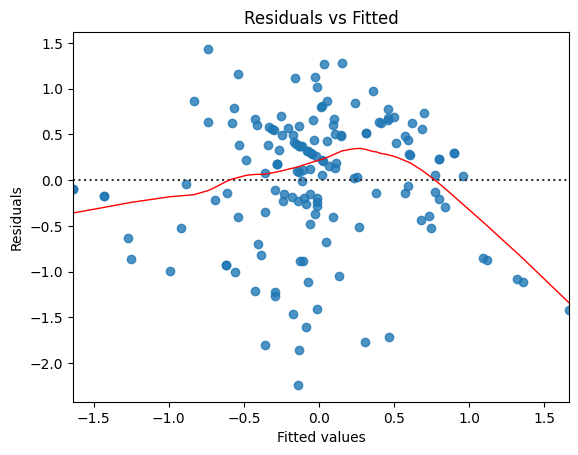

In [110]:
y_pred = model.predict(X)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

- The relationship between predictors and the response variable are not linear.
- Non-Constant Variance (Heteroscedasticity): The "mountain" shape could also indicate that the variance of the errors is not constant across levels of the independent variable, which violates the assumption of homoscedasticity but we'll test it with diagnostics.

##### OLS model

In [ ]:
import statsmodels.api as sm
import pandas as pd
y = sanctions_fl_filtered['political-stability-value']
X = sanctions_fl_filtered[['Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary().as_latex())


In [112]:
from sklearn.linear_model import LinearRegression
import numpy as np
y = sanctions_fl_filtered['political-stability-value'].dropna()
filtered_data = sanctions_fl_filtered[['political-stability-value', 'Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment']].dropna()

y = filtered_data['political-stability-value']
X = filtered_data[['Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment']]
model = LinearRegression(fit_intercept=True)  # fit_intercept=True adds the constant (
model.fit(X, y)
intercept = model.intercept_
coef = model.coef_
r_squared = model.score(X, y)

print(f"Intercept: {str(intercept)}")
print(f"Coefficients: {str(coef)}")
print(f"R squared: {r_squared}")


Intercept: -0.20826935549085324
Coefficients: [-2.28663247e-01  2.38868764e-05 -2.74666605e-02  9.40282502e-03]
R squared: 0.37447062387082586


#### **2. Multicollinearity**: Multicollinearity refers to the situation where two or more independent variables in a multiple regression model are highly correlated.

In [113]:
#VIF for each variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                feature       VIF
0              Severity  1.039786
1           endyear-gdp  1.410944
2     endyear-inflation  1.339513
3  endyear-unemployment  1.816971


**Severity:** The VIF is 1.02, which is very close to 1. This suggests that this predictor is not correlated with other variables.

**endyear-gdp:** The VIF is 1.14, suggesting low multicollinearity.

**endyear-inflation:** The VIF is 1.14, suggesting low multicollinearity.

**endyear-unemployment:** The VIF is 1.01, indicating very low multicollinearity.

##### **PCA (Principal Component Analysis) for Multicollinearity**

In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [115]:
np.random.seed(0)
n = 100

In [116]:
filtered_data = sanctions_fl_filtered[['political-stability-value', 'Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment']].dropna()
y = filtered_data['political-stability-value']

X = filtered_data[['Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
explained_variance = pca.explained_variance_ratio_
explained_variance, X_pca_df.head()

(array([0.34894375, 0.26714714, 0.21956934, 0.16433977]),
         PC1       PC2       PC3       PC4
 0 -0.426380  1.754144  0.856781 -0.939018
 1 -0.716554 -0.131827 -0.404813  0.367068
 2 -2.135215 -0.765701 -0.222685  1.300671
 3  0.003916  0.685093 -0.042578 -0.779104
 4 -0.572769  0.421787  0.177921  0.026664)

###### **OLS model with PCA**

In [117]:
from sklearn.linear_model import LinearRegression
model_pca = LinearRegression(fit_intercept=True)
model_pca.fit(X_pca, y)

intercept_pca = model_pca.intercept_
coef_pca = model_pca.coef_
r_squared_pca = model_pca.score(X_pca, y)
intercept_pca, coef_pca, r_squared_pca

(-0.011313332278676392,
 array([-0.466036  ,  0.00350852, -0.0286768 ,  0.0790817 ]),
 0.37447062387082575)

The R squared value remains pretty much the same compared to the previous model.

#### **3. Heteroskedasticity**: Examine a plot of the residuals and the values that were predicted. No "funnel" form should be present in the spread. In a regression model, heteroskedasticity is the existence of error terms with uneven variances at various levels of the independent variable(s). In other words, not all levels of the independent variables have the same amount of residual variability. Contrary to homoskedasticity, which maintains the error variances across levels of the independent variables, this is not the case.

### Model with PCA

In [ ]:
pip install statsmodels

In [119]:
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt
from scipy.stats import shapiro


X_with_const = sm.add_constant(X_pca)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

# Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test:")
print(lzip(labels, bp_test))

# White test
white_test = het_white(model.resid,  model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nWhite test:")
print(lzip(labels, white_test))

# Goldfeld-Quandt test
gq_test = het_goldfeldquandt(model.resid, model.model.exog)
labels = ['F statistic', 'p-value']
print("\nGoldfeld-Quandt test:")
print(lzip(labels, gq_test))

# Shapiro-Wilk test
shapiro_test = shapiro(model.resid)
print("\nShapiro-Wilk test:")
print(f"Statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")


                                OLS Regression Results                               
Dep. Variable:     political-stability-value   R-squared:                       0.374
Model:                                   OLS   Adj. R-squared:                  0.357
Method:                        Least Squares   F-statistic:                     21.85
Date:                       Thu, 31 Aug 2023   Prob (F-statistic):           3.79e-14
Time:                               17:33:52   Log-Likelihood:                -164.08
No. Observations:                        151   AIC:                             338.2
Df Residuals:                            146   BIC:                             353.3
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt
from scipy.stats import shapiro

X_with_const = sm.add_constant(X_pca)
model = sm.OLS(y, X_with_const).fit()

latex_summary = model.summary().as_latex()
print("\nOLS Summary in LaTeX:")
print(latex_summary)

#### **4.  Normality**: In the context of the Gauss-Markov assumptions, normality refers to the assumption that the error terms in a regression model are normally distributed, particularly important for making statistical inferences from the model.

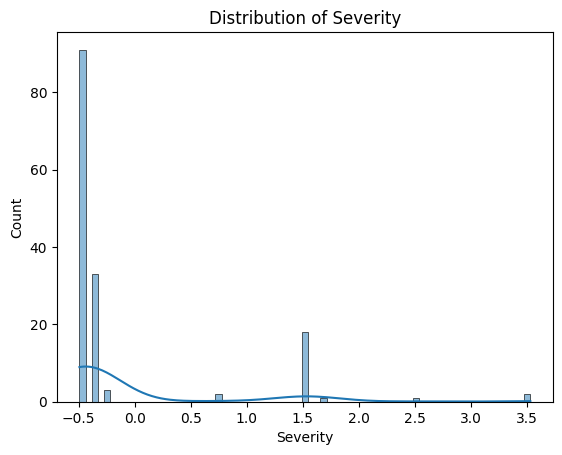

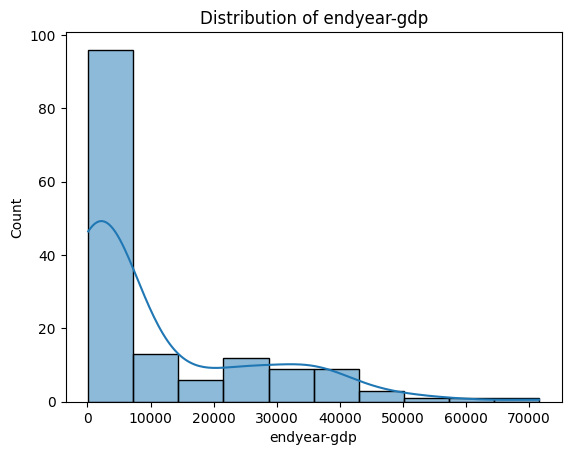

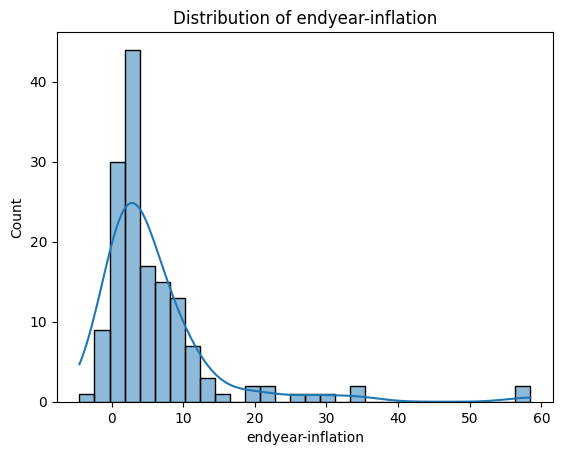

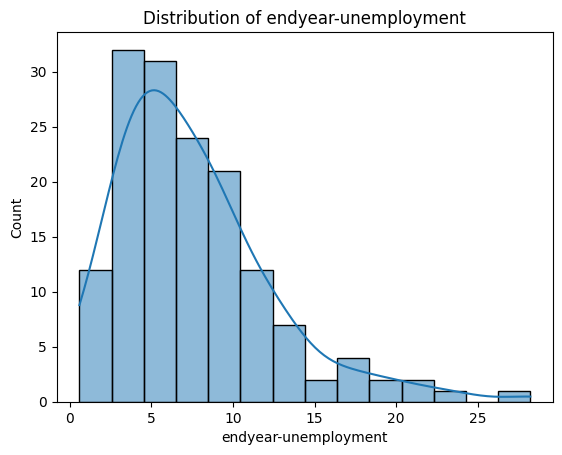

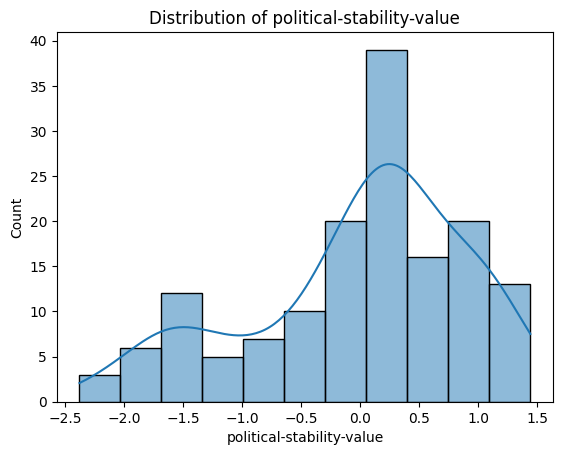

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_to_check = ['Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment', 'political-stability-value']

for var in variables_to_check:
    sns.histplot(filtered_data[var], kde=True)
    plt.title(f'Distribution of {var}')

    plt.show()


##### Box-Cox Transformation

In [122]:
from scipy.stats import boxcox

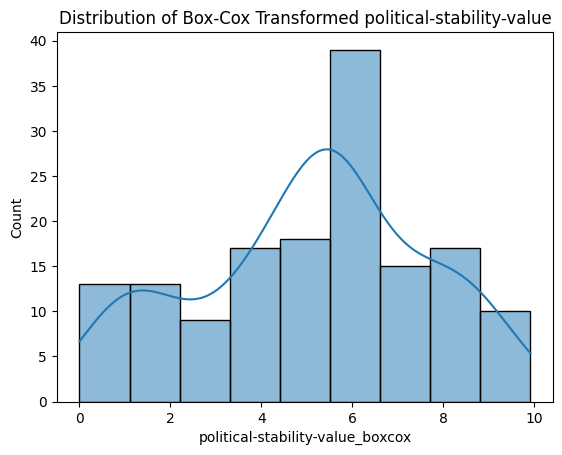

The optimal lambda value for the Box-Cox transformation is 1.9009749923183055


In [123]:
constant_to_add = 1 - filtered_data['political-stability-value'].min()
filtered_data['political-stability-value_shifted'] = filtered_data['political-stability-value'] + constant_to_add
transformed_response, lambda_value = boxcox(filtered_data['political-stability-value_shifted'])
filtered_data['political-stability-value_boxcox'] = transformed_response
sns.histplot(filtered_data['political-stability-value_boxcox'], kde=True)
plt.title('Distribution of Box-Cox Transformed political-stability-value')
plt.show()
print(f"The optimal lambda value for the Box-Cox transformation is {lambda_value}")


##### Log transformation of the variables

In [ ]:
filtered_data.dropna(inplace=True)

constant_to_add = 1
cols_to_transform = ['Severity', 'endyear-gdp', 'endyear-inflation', 'endyear-unemployment']
filtered_data[cols_to_transform] = filtered_data[cols_to_transform].apply(lambda x: x + constant_to_add)
filtered_data_log = np.log(filtered_data[cols_to_transform])
filtered_data_log.columns = [f"{col}_log" for col in cols_to_transform]
filtered_data = pd.concat([filtered_data, filtered_data_log], axis=1)
print(filtered_data.isnull().sum())
print((filtered_data == 0).sum())
print((filtered_data < 0).sum())


In [ ]:
filtered_data.dropna()

In [126]:
filtered_data.dropna(inplace=True)

OLS with Box-Cox and Log Transformation

In [ ]:
y = filtered_data['political-stability-value_shifted']
X_with_const = sm.add_constant(filtered_data[["Severity_log","endyear-gdp_log","endyear-inflation_log","endyear-unemployment_log"]])
model = sm.OLS(y, X_with_const).fit()
latex_summary = model.summary().as_latex()
print(latex_summary)
# or to save it to a .tex file:
with open("model_summary.tex", "w") as f:
    f.write(latex_summary)



## Generalized Least Squares

In [ ]:
pip install scikit-learn

In [138]:
import statsmodels.api as sm
y = filtered_data['political-stability-value_shifted']
X = filtered_data[["Severity_log","endyear-gdp_log","endyear-inflation_log","endyear-unemployment_log"]]
X_with_const = sm.add_constant(X)
glm_gamma = sm.GLM(y, X_with_const, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_gamma.fit()
print(glm_results.summary())


                         Generalized Linear Model Regression Results                         
Dep. Variable:     political-stability-value_shifted   No. Observations:                  148
Model:                                           GLM   Df Residuals:                      143
Model Family:                                  Gamma   Df Model:                            4
Link Function:                                   Log   Scale:                        0.048773
Method:                                         IRLS   Log-Likelihood:                -169.54
Date:                               Thu, 31 Aug 2023   Deviance:                       8.1540
Time:                                       18:12:35   Pearson chi2:                     6.97
No. Iterations:                                   11   Pseudo R-squ. (CS):             0.5461
Covariance Type:                           nonrobust                                         
                               coef    std err          z   

In [ ]:
print(glm_results.summary().as_latex())

**Review of the model:**

**Model Performance:** Our dependent variable, "political-stability-value_shifted," has a pseudo R-squared of 0.5461, which indicates that the model still adequately explains roughly 54% of the variation.

**Important variables**

With a p-value of 0.003, *severity_log* is statistically significant. The negative coefficient suggests that a decline in political stability is correlated with an increase in severity.

With a p-value of less than 0.0001, *endyear-gdp_log* is still significant. The favorable coefficient shows that GDP continues to be essential in promoting political stability.

With a p-value of 0.040, *endyear-inflation_log* is also statistically significant, indicating that, while less strongly than the other factors, higher inflation tends to impair political stability.

**Variables to Take Again:**

With a p-value of 0.700, *endyear-unemployment_log* doesn't appear to be statistically significant. Its inclusion in the model is currently debatable.

Since our predictors do longer adequately account for the baseline level of political stability, the constant term is now substantial and positive.
Political stability decreases by around 0.094 units for every unit rise in the log of severity, holding other variables constant.

**What Comes Next?**

Given the poor performance of endyear-unemployment_log, it could be worthwhile to remove it or swap it out for another predictor in further rounds.
Measures of fit-quality:

Additionally given are Our Deviance and Pearson chi2, however these are additional technical details that can be explored by individuals who are engrossed in the details.

In conclusion, despite the model's reduction, we still have a robust set of predictors that can accurately capture political stability. The model might then be improved, and possibly interaction terms or additional predictors could be included to increase the Pseudo R-squared a little bit.